# Linear Regression (Real Estate Data)

We will be using a small dataset containing the data for the real estate market and will try to predict the value of houses (represented by house price of unit area) using the distance from the nearest MRT station.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

## Real Estate Data
We are going to use some data about the real estate market.

In [2]:
df = pd.read_csv("RealEstate.csv")
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Given a dataset, the name of a column and a degree it generates all the additional columns needed to perform a polynomial regression

We define a helper function to plot the original data against the data generated by a model

In [3]:
def plot_scatter(x,y,xp,yp,title="",xlabel="",ylabel="",xrange=None):
    """Plots the original data (x,y) and a set of point (xp,yp) showing the model approximation"""
    font = {'family' : 'sans',
        'size'   : 14}
    plt.rc('font', **font)

    plt.scatter(x, y,  color='blue')
    plt.plot(xp, yp, color='red', linewidth=3)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if (not (xrange is None)):
        plt.xlim(xrange)
    
    if (title!=""):
        plt.title(title)
    plt.show()

# Simple Linear Regression
We start with a very basic model using one input variable $x$ and fits the data using the model $y = w_0 + w_1x$. For example, we can use variable "distance to the nearest MRT station" as input to predict the target variable "house price of unit area". 

First, we create the matrix X of inputs and the target vector y. 

In [4]:
y = df["Y house price of unit area"].values
X = df["X3 distance to the nearest MRT station"].values.reshape(-1,1)

ylabel = "House price of unit area"
xlabel = "Distance to the nearest MRT station"

xrange = [0,X.max().round(-1)+100]
yrange = [y.min().round(-1), y.max().round(-1)+10]

Next, we create a linear regressor and fit it with the input/output data.

In [5]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X, y);

We can now compute the R^2 score and RSS by first computing the predicted output yp.

In [6]:
yp = linear_regressor.predict(X)

r2 = r2_score(y,yp)

rss = sum((yp-y)*(yp-y))

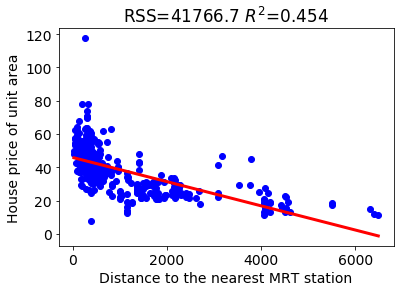

In [7]:
title = "RSS=%.1f $R^2$=%.3f"%(rss,r2)
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
yplot = linear_regressor.predict(Xplot)
plot_scatter(X,y,Xplot,yplot,title, ylabel=ylabel,xlabel=xlabel)

## Residuals Plots

RSS and $R^2$ provide an overall evaluation of our model. It is more interesting to explore how our model makes mistakes by analyzing the residuals, that is the difference between the target values and the fitted values. We can analyze the model errors either by plotting (i) the predicted values against the actual values of the target variable and (ii) the predicted values against the residual error. We start by plotting the first option.

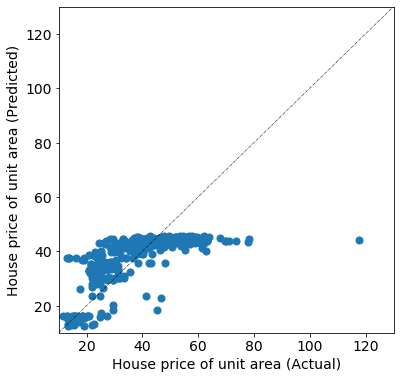

In [9]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y, yp, s=50)
plt.xlim(yrange)
plt.ylim(yrange)
plt.show()

We can zoom in on the small bottom area. If we predict very well, all the points are on the dashed line.

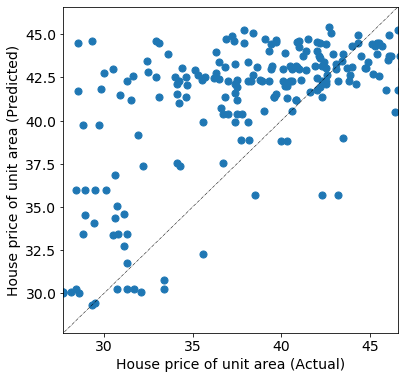

In [10]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y, yp, s=50)
plt.xlim([np.quantile(y,.25),np.quantile(y,.75)])
plt.ylim([np.quantile(y,.25),np.quantile(y,.75)])
plt.show()

Next, we compute the residuals and then we plot them.

In [11]:
residuals = y-yp

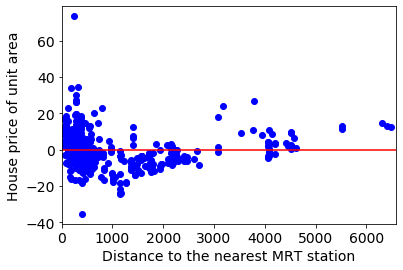

In [12]:
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)
plt.scatter(X, residuals,  color='blue')
plt.plot(xrange,[0,0],'-',c="red")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xlim(xrange)
plt.show()

The points are not all randomly scattered, showing different variances at different values of the input variable. We can also spot some patterns (for examples, points in a straight line). The plot using z-score normalized residuals is more informative since the values -3 and 3 represents the range containing the 99.7% of the values

In [13]:
from sklearn.preprocessing import StandardScaler
normalized_residuals = StandardScaler().fit_transform(residuals.reshape(-1,1))

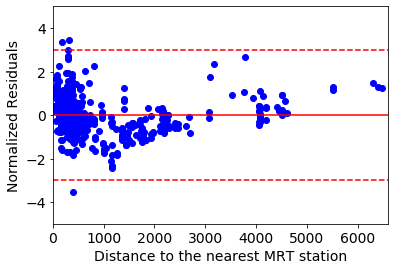

In [14]:
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)
plt.scatter(X, normalized_residuals,  color='blue')
plt.plot(xrange,[0,0],'-',c="red")
plt.plot(xrange,[-3,-3],'--',c="red")
plt.plot(xrange,[3,3],'--',c="red")
plt.xlabel(xlabel)
plt.ylabel("Normalized Residuals")
plt.xlim(xrange)
plt.ylim([-5,5])
plt.show()

# Multiple Linear Regression
We can build a model to predict the target variable using more input variables from the ones available in the data. However, in this example to be able to plot the model using more input variables, we consider polynomial models based on the same input variable. 

In [15]:
from sklearn.preprocessing import PolynomialFeatures

Let' start by computing a model using a second degree polynomial. Next, we use linear regression to fit the new input data and the target variable.

In [16]:
polynomial2 = PolynomialFeatures(degree=2, include_bias=False)
X2 = polynomial2.fit_transform(X)

In [17]:
linear_regressor2 = linear_model.LinearRegression()
X2.reshape(-1,2)
linear_regressor2.fit(X2, y);
yp2 = linear_regressor2.predict(X2)

Let's evaluate the model and plot it.

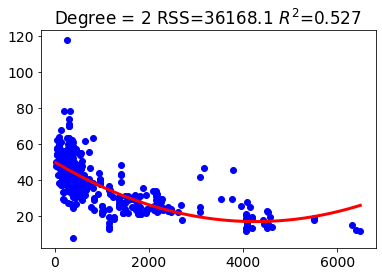

In [18]:
r2_p2 = r2_score(y,yp2)
rss_p2 = sum((yp2-y)*(yp2-y))

# let's create the input data to plot the model
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
Xplot2 = polynomial2.fit_transform(Xplot)

# compute the model on the plot data
yplot2 = linear_regressor2.predict(Xplot2)

plot_scatter(X[:,0],y,Xplot2[:,0],yplot2,"Degree = 2 RSS=%.1f $R^2$=%.3f"%(rss_p2,r2_p2))

We can increase the degree of the polynomial and check whether and how much the model improves.

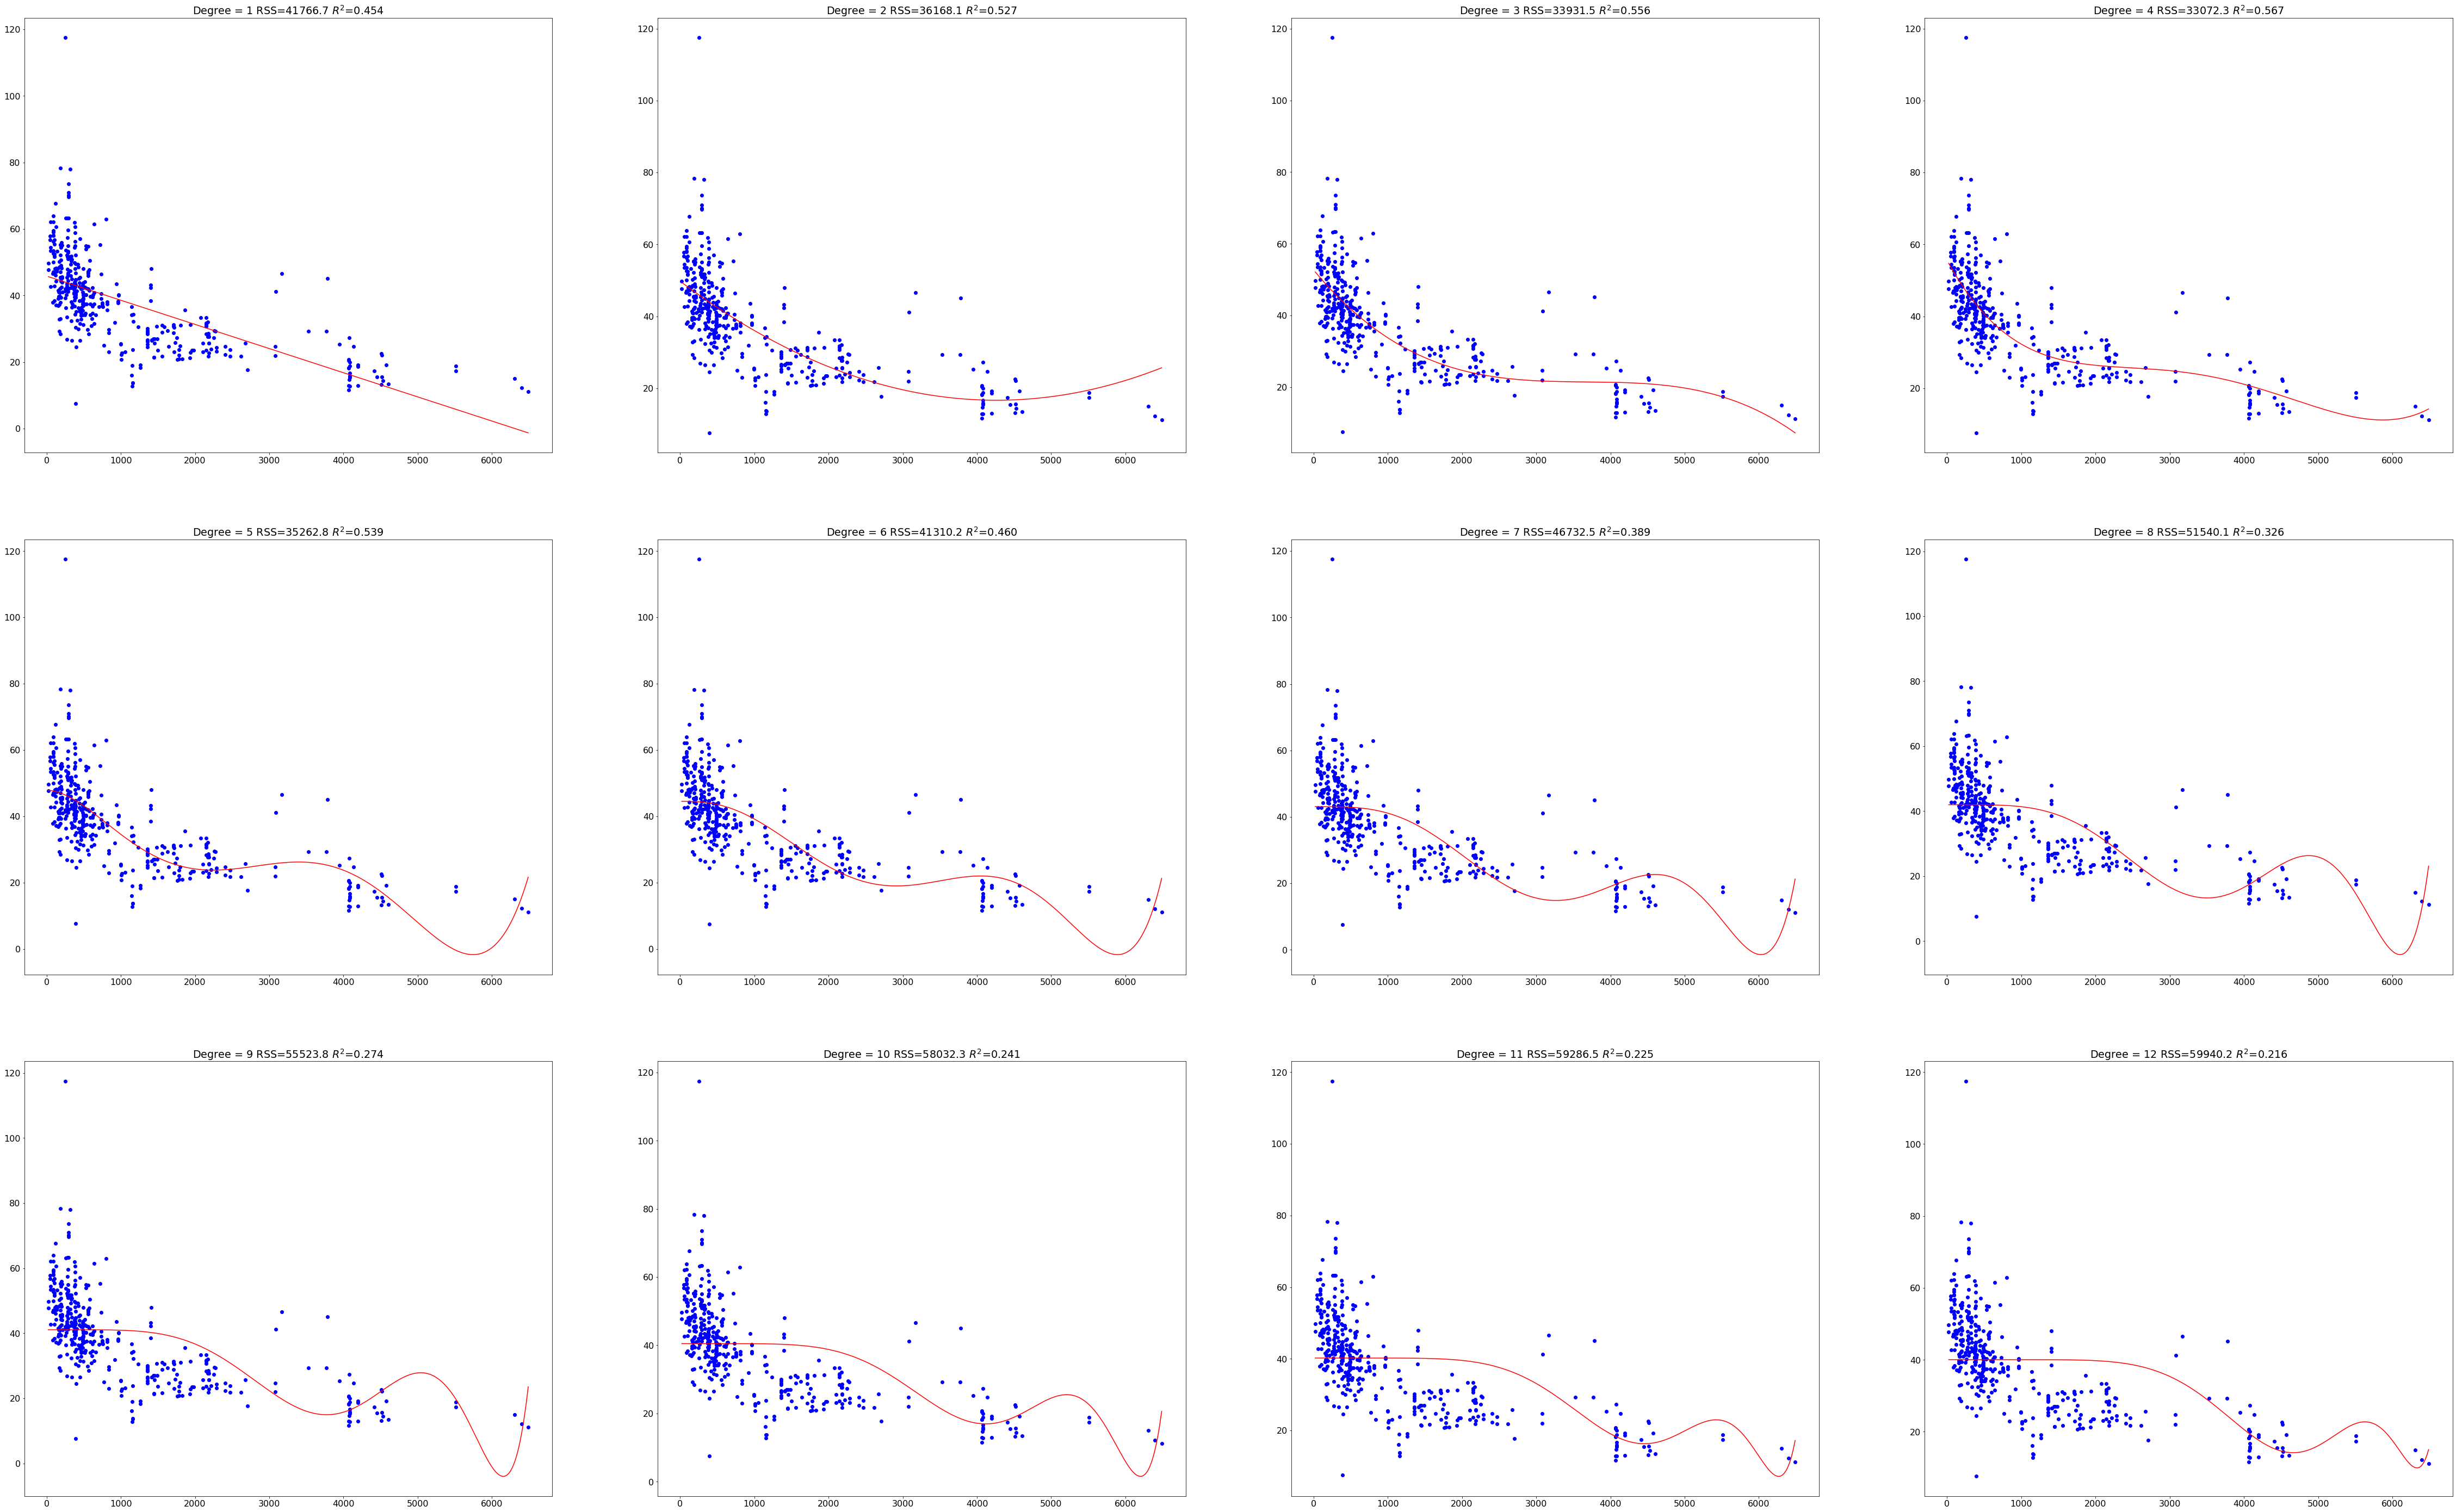

In [22]:
max_polynomial = 12
f, axarr = plt.subplots(3, 4)

plt.rcParams['figure.figsize'] = (40.0, 20.0)
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)

for degree in range(1,max_polynomial+1):
    if (degree!=1):
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_polynomial = polynomial.fit_transform(X)
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = polynomial.fit_transform(Xplot)
    else:
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = Xplot
        X_polynomial = X
    

    linear_regressor = linear_model.LinearRegression()
    X_polynomial.reshape(-1,degree)
    linear_regressor.fit(X_polynomial, y);

    yp = linear_regressor.predict(X_polynomial)
    yplot = linear_regressor.predict(Xplot_polynomial)

    r2 = r2_score(y,yp)
    rss = sum((yp-y)*(yp-y))

    title = "DEGREE "+str(degree)+" RSS=" + str(round(rss,3))+" R="+str(round(r2,3))
    
    target_plot = axarr[int((degree-1)/4),int((degree-1)%4)]
    target_plot.scatter(X[:,0],y, color="blue")
    target_plot.set_title("Degree = %d RSS=%.1f $R^2$=%.3f"%(degree,rss,r2))
    target_plot.plot(Xplot2[:,0],yplot, color="red")

As can be noted the RSS decreases as the degree of the polynomial increases. Only for a degree of 12 we note an increase of RSS and a decrease of $R^2$. However, this is not a robust evaluation since we are scoring the models on the same data we used to build the model. To get a robust evaluation we need to either split the data into train set and test set, build the model on the train set, and evaluate the model on the test set. Or we can apply crossvalidation. 

## Model Evaluation Using a Test Set
To evaluate the model we now split the data between train and test using 2/3 of the data for training and 1/3 for testing. We start with the simple linear regression we done at the beginning. Note that to be able to replicate the results we are setting a random seed.

In [21]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=1234)

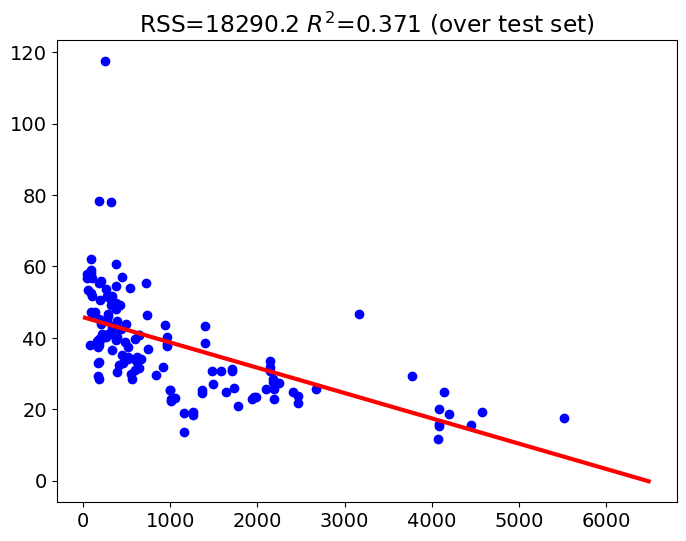

In [22]:
# build the model on the train
linear_regressor.fit(X_train, y_train);

# evaluate the model on the test
yp = linear_regressor.predict(X_test)

r2 = r2_score(y_test,yp)

rss = sum((yp-y_test)*(yp-y_test))

title = "RSS=%.1f $R^2$=%.3f (over test set)"%(rss,r2)
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
yplot = linear_regressor.predict(Xplot)
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plot_scatter(X_test,y_test,Xplot,yplot,title)

Note that RSS is lower since it is computed over a smaller data set. R$^2$ is slightly better. Let's see what happens with higher polynomials.

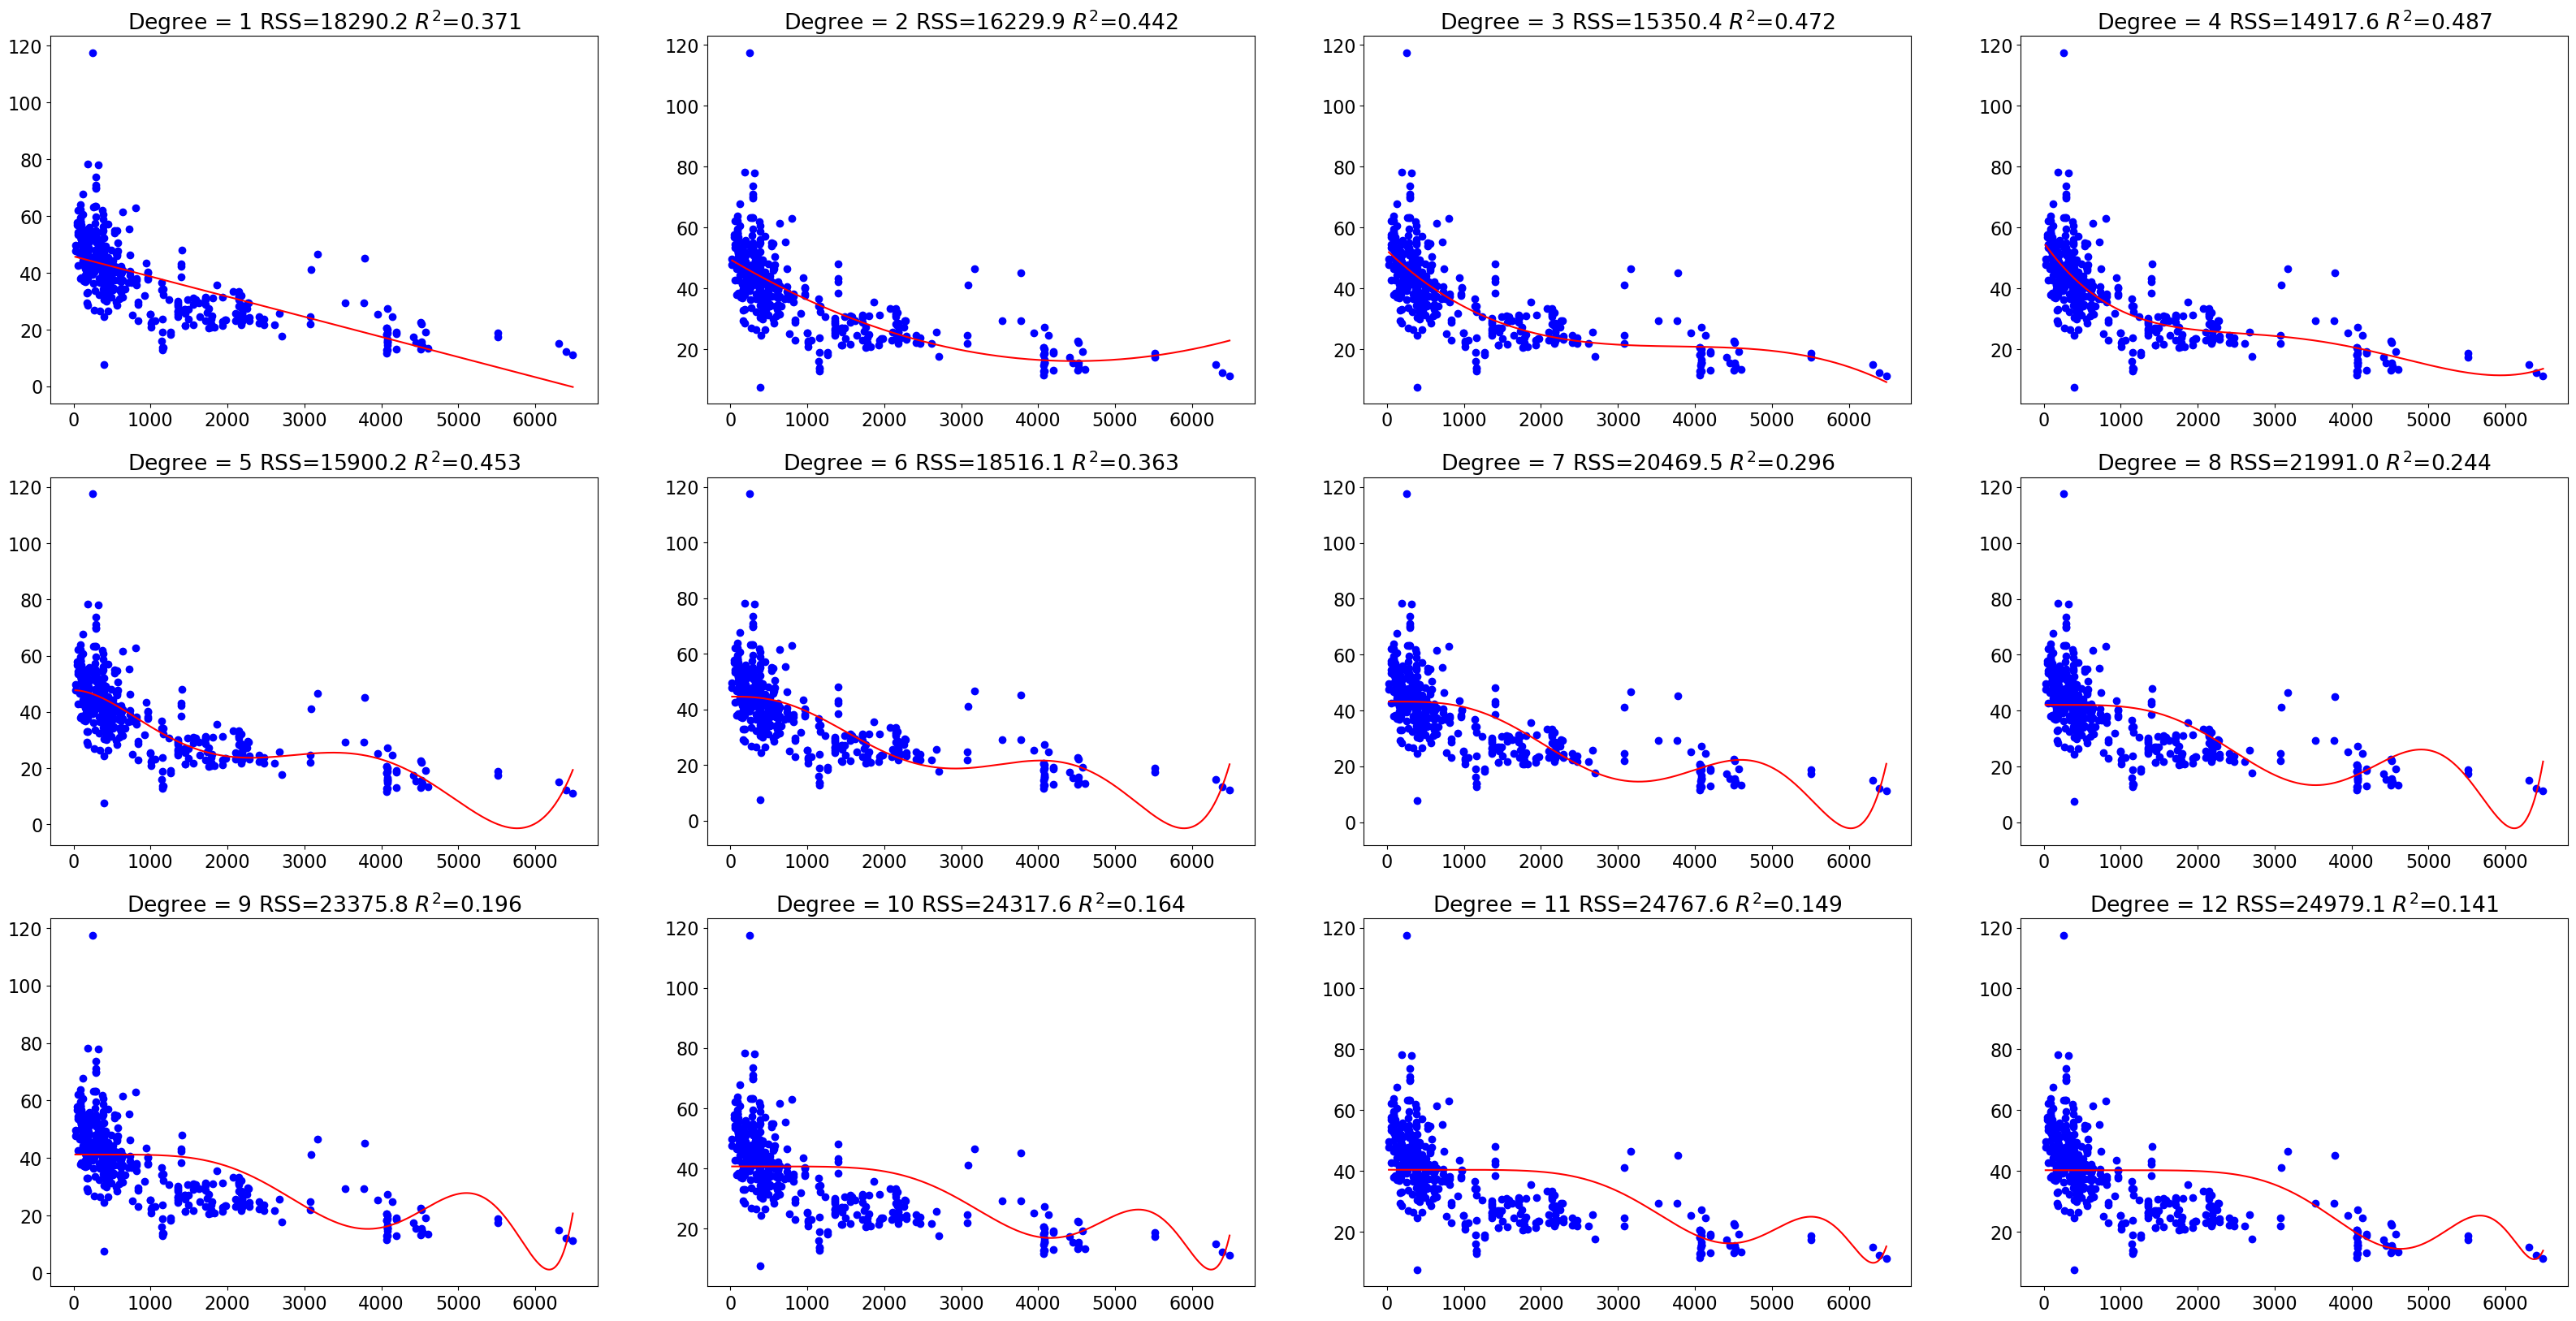

In [24]:
max_polynomial = 12
f, axarr = plt.subplots(3, 4)

plt.rcParams['figure.figsize'] = (40.0, 20.0)
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)

rss_train_values = []
r2_train_values = []


rss_values = []
r2_values = []

for degree in range(1,max_polynomial+1):
    if (degree!=1):
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_polynomial = polynomial.fit_transform(X)
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = polynomial.fit_transform(Xplot)
    else:
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = Xplot
        X_polynomial = X
    

    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_polynomial, y, test_size=0.33, random_state=1234)
    
    linear_regressor = linear_model.LinearRegression()
    X_polynomial.reshape(-1,degree)
    linear_regressor.fit(X_train, y_train);

    yp_train = linear_regressor.predict(X_train)
    r2_train = r2_score(y_train,yp_train)
    rss_train = ((yp_train-y_train)**2).sum()
    rss_train_values.append(rss_train)
    r2_train_values.append(r2_train)

    yp = linear_regressor.predict(X_test)
    yplot = linear_regressor.predict(Xplot_polynomial)

    r2 = r2_score(y_test,yp)
    rss = ((yp-y_test)**2).sum()
    
    rss_values.append(rss)
    r2_values.append(r2)

    title = "DEGREE "+str(degree)+" RSS=" + str(round(rss,3))+" R="+str(round(r2,3))
    
    target_plot = axarr[int((degree-1)/4),int((degree-1)%4)]
    target_plot.scatter(X[:,0],y, color="blue")
    target_plot.set_title("Degree = %d RSS=%.1f $R^2$=%.3f"%(degree,rss,r2))
    target_plot.plot(Xplot2[:,0],yplot, color="red")

We can plot how RSS and R$^2$ changes based on the degree of the polynomial approximation. 

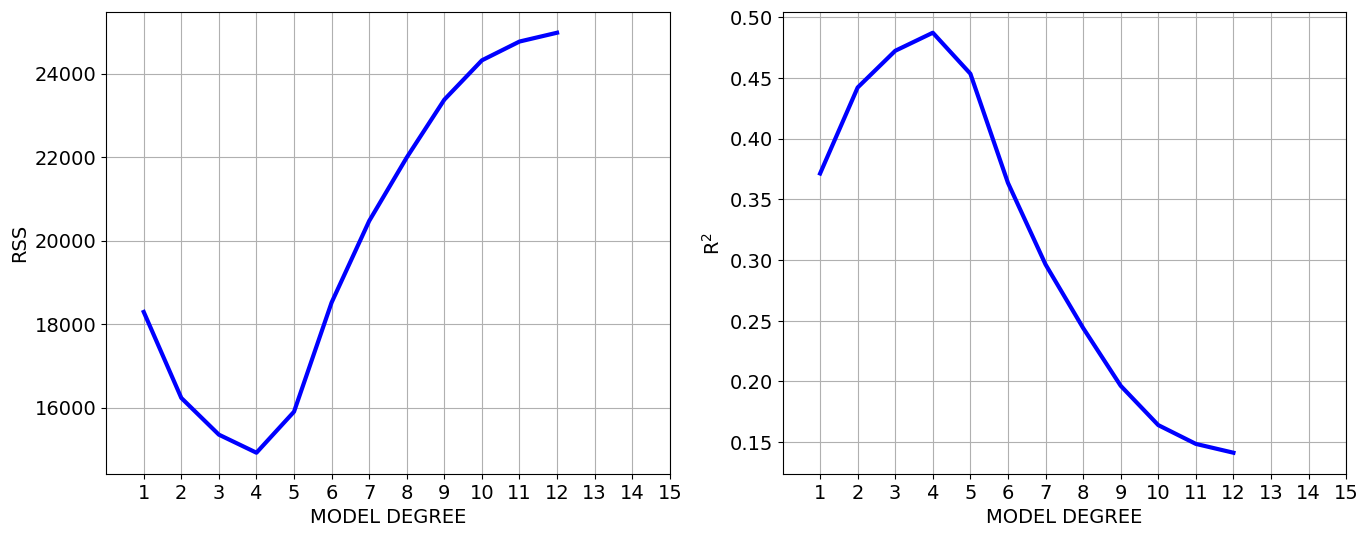

In [25]:
plt.rcParams['figure.figsize'] = (16.0, 6.0)
font = {'family' : 'sans', 'size':14}
plt.rc('font', **font)
f, axarr = plt.subplots(1, 2)

axarr[0].set_xlabel("MODEL DEGREE")
axarr[0].set_ylabel("RSS")
axarr[0].set_xlim([0,13])
axarr[0].set_xticks(range(1,16))
axarr[0].grid()
axarr[0].plot(range(1,max_polynomial+1), rss_values, color="blue",linewidth=3);

axarr[1].set_xlabel("MODEL DEGREE")
axarr[1].set_ylabel("R$^2$")
axarr[1].set_xlim([0,13])
axarr[1].set_xticks(range(1,16))
axarr[1].grid()
axarr[1].plot(range(1,max_polynomial+1), r2_values, color="blue",linewidth=3);

Note that as the degree of the polynomial increases until a value of 4, the RSS decreases and similarly R$^2$ inscreases. Then the RSS starts increasing again, the model is starting to overfit the data. The results appear to suggest that a polynomial of degree 4 is the best choice, but are we sure? Our evaluation is based on one run performed over a specific train/test partition. To have a more robust evaluation we can either repeat the procedure with different train/test partitions or otherwise use crossvalidation.

The experiment suggests that we should use a polynomial of degree 4. Let's check the residuals for such a model.

In [26]:
degree=4
polynomial = PolynomialFeatures(degree=degree, include_bias=False)
X_polynomial = polynomial.fit_transform(X)
Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
Xplot_polynomial = polynomial.fit_transform(Xplot)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_polynomial, y, test_size=0.33, random_state=1234)
    
linear_regressor = linear_model.LinearRegression()
X_polynomial.reshape(-1,degree)
linear_regressor.fit(X_train, y_train);

yp_train = linear_regressor.predict(X_train)
r2_train = r2_score(y_train,yp_train)
rss_train = ((yp_train-y_train)**2).sum()
rss_train_values.append(rss_train)
r2_train_values.append(r2_train)

yp = linear_regressor.predict(X_test)
yplot = linear_regressor.predict(Xplot_polynomial)

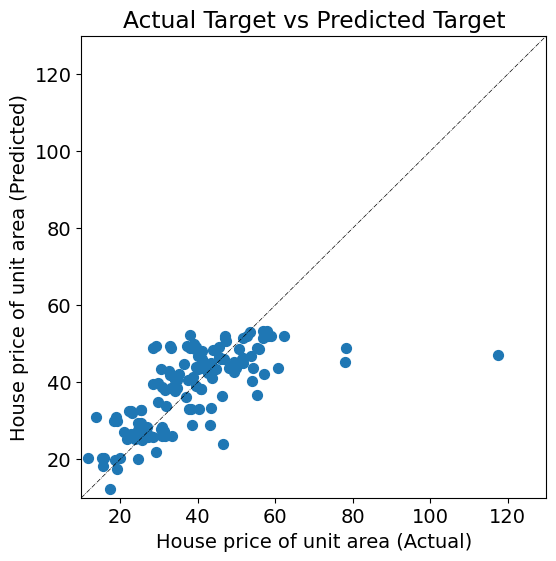

In [27]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y_test, yp, s=50)
plt.title("Actual Target vs Predicted Target")
plt.xlim(yrange)
plt.ylim(yrange)
plt.show()

There is quite an improvement with respect to the early plot.

## Model Evaluation using Crossvalidation
We now repeat the procedure but evaluate the model using crossvalidation.

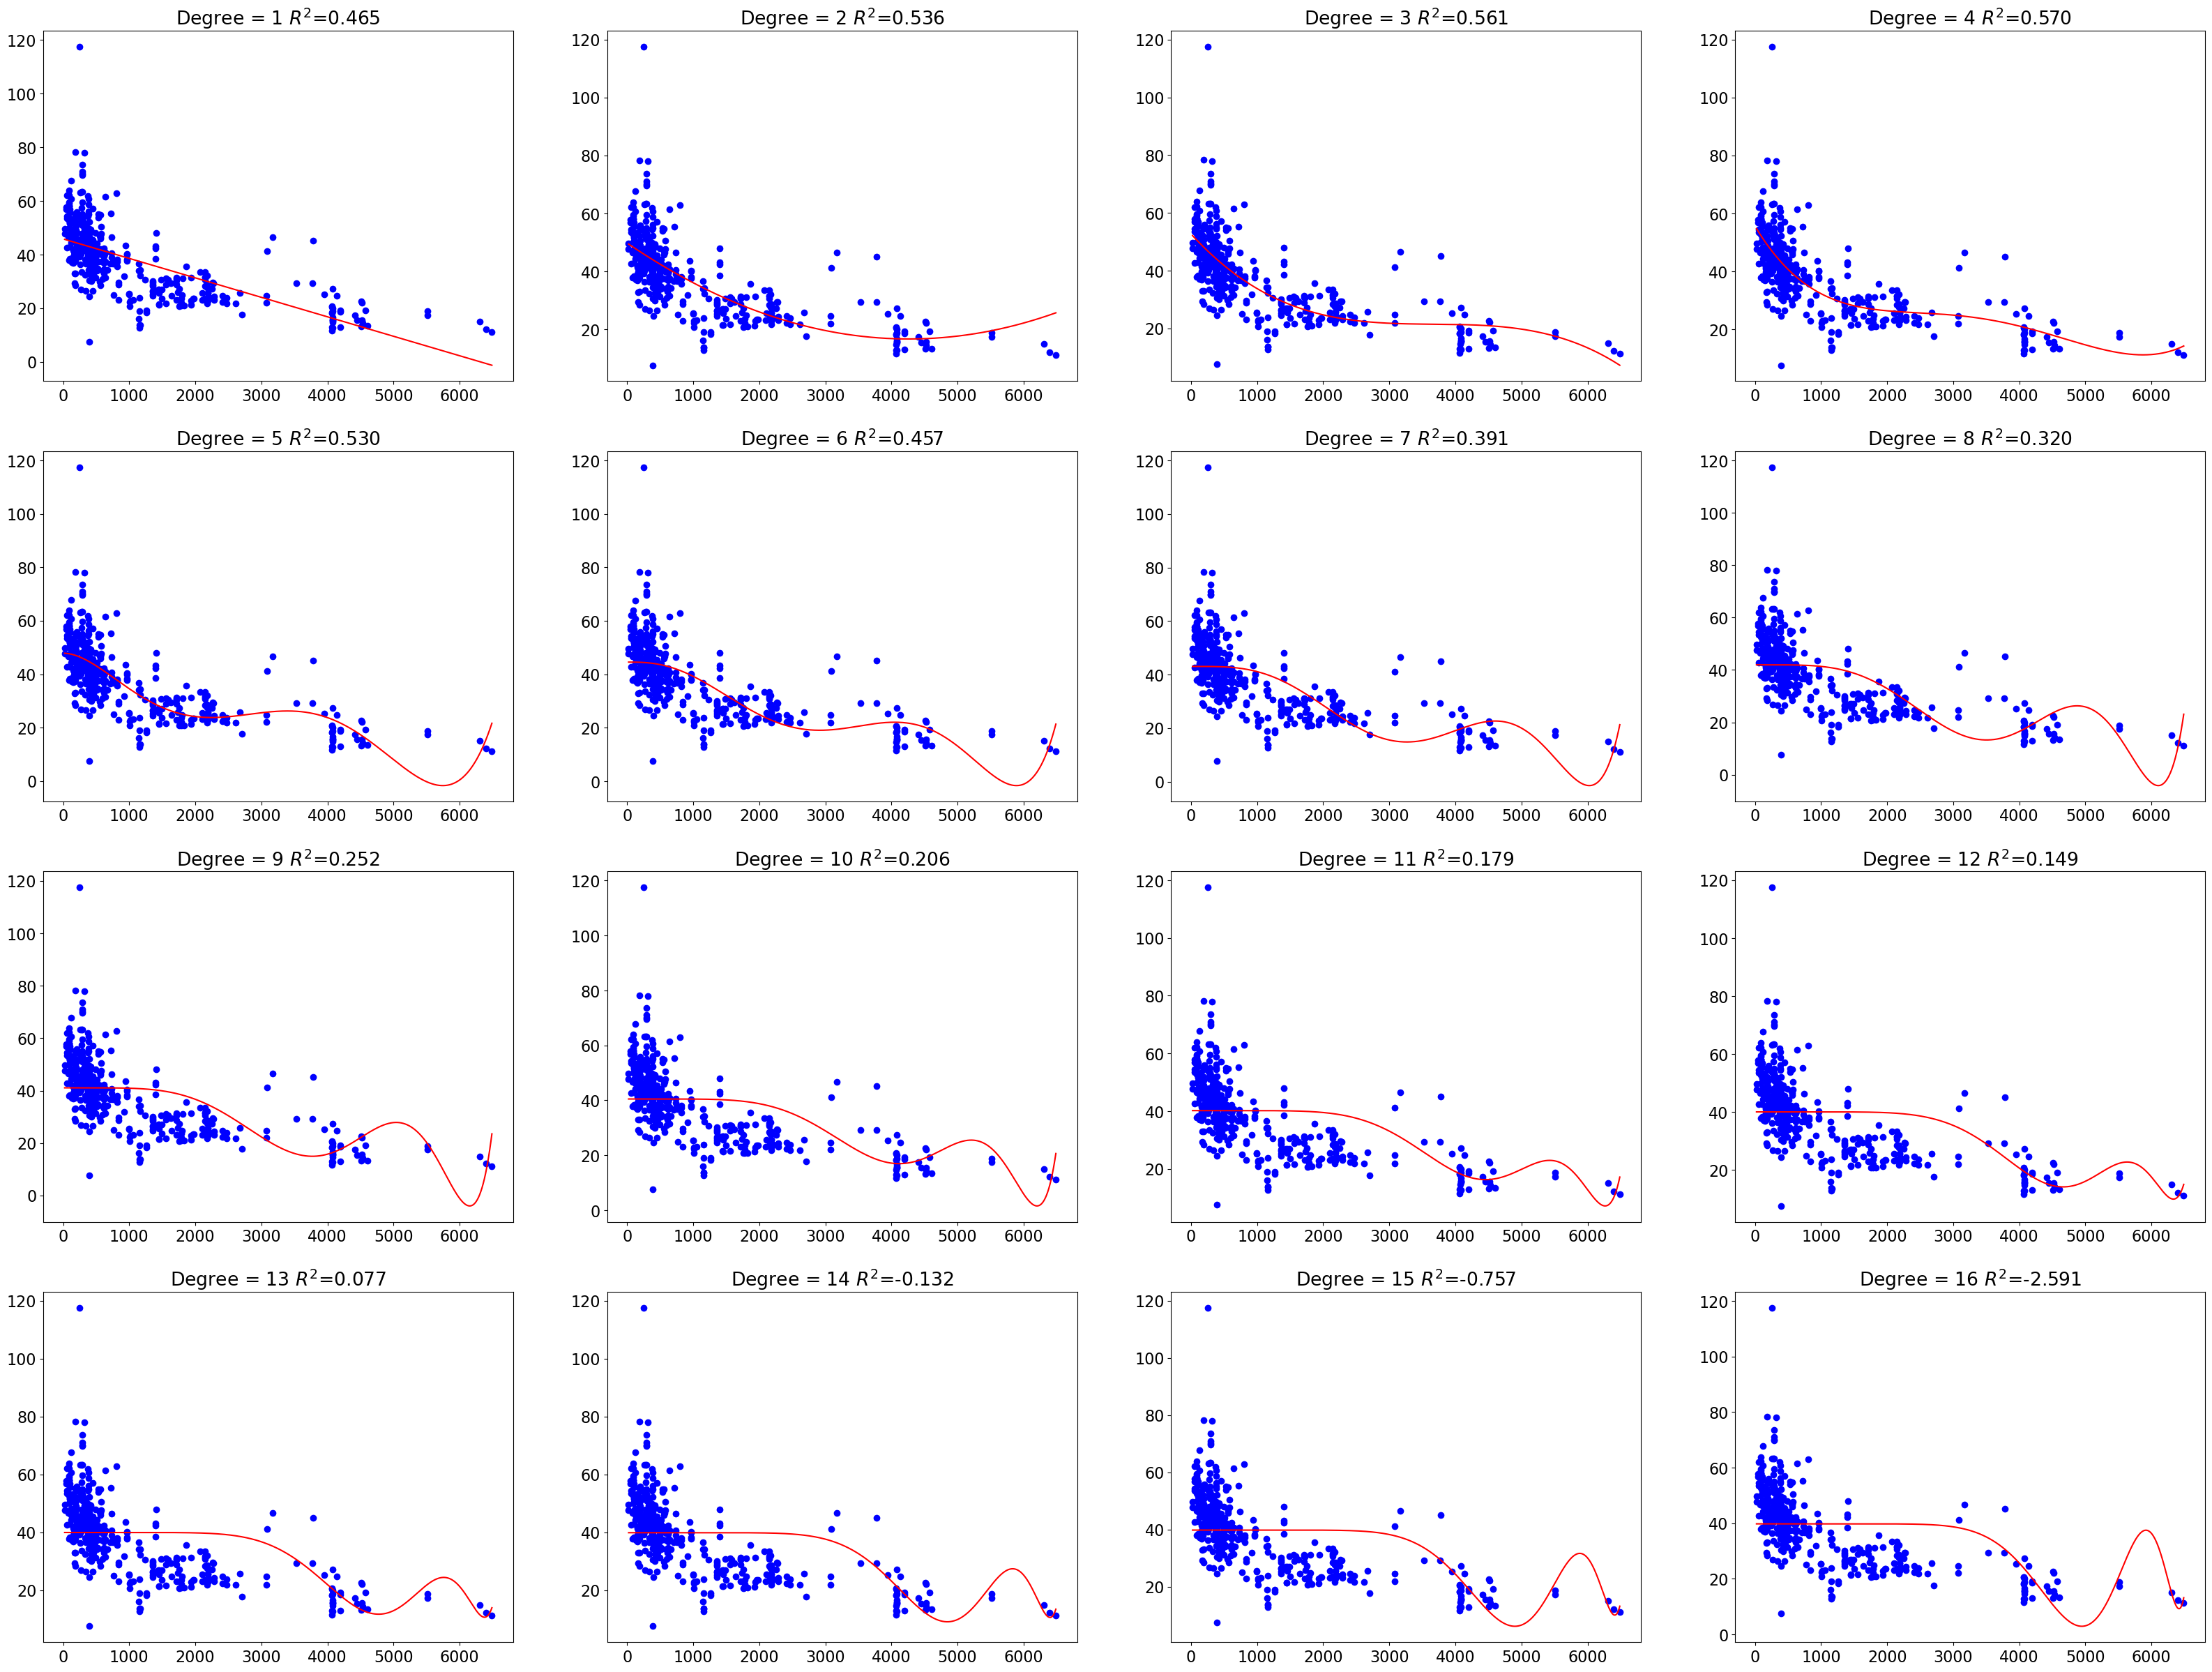

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

max_polynomial = 16
f, axarr = plt.subplots(4, 4)

plt.rcParams['figure.figsize'] = (40.0, 30.0)
font = {'family' : 'sans', 'size'   : 16}
plt.rc('font', **font)

rss_values = []
r2_values = []

for degree in range(1,max_polynomial+1):
    if (degree!=1):
        polynomial = PolynomialFeatures(degree=degree, include_bias=False)
        X_polynomial = polynomial.fit_transform(X)
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = polynomial.fit_transform(Xplot)
    else:
        Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
        Xplot_polynomial = Xplot
        X_polynomial = X
    

    linear_regressor = linear_model.LinearRegression()

    X_polynomial.reshape(-1,degree)

    # score returns the scores for each single run
    score = cross_val_score(linear_regressor, X_polynomial, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))

    r2 = score.mean()    
    r2_values.append(r2)
    
    # let's build the final model (using **all the data**)
    linear_regressor.fit(X_polynomial,y)
    yplot = linear_regressor.predict(Xplot_polynomial)

    title = "DEGREE "+str(degree)+" RSS=" + str(round(rss,3))+" R="+str(round(r2,3))
    
    target_plot = axarr[int((degree-1)/4),int((degree-1)%4)]
    target_plot.scatter(X[:,0],y, color="blue")
    target_plot.set_title("Degree = %d $R^2$=%.3f"%(degree,r2))
    target_plot.plot(Xplot2[:,0],yplot, color="red")
    

As you can note the evaluation given by crossvalidation is less "optimistic" about the performance of our models, in fact the values of R$^2$ are generally lower. Also if we plot R$^2$ as a function of the degree (below) we have a much different curve that suggests a degree of 5 or 6 as the best choice --- a quite different result with respect to the previous basic holdout evaluation. Note that, for higher degree polynomials R$^2$ becomes negative, this means that the model performs worst that the basic mean. The model tries very hard to fit the training data so to become useless to predict unseen cases.

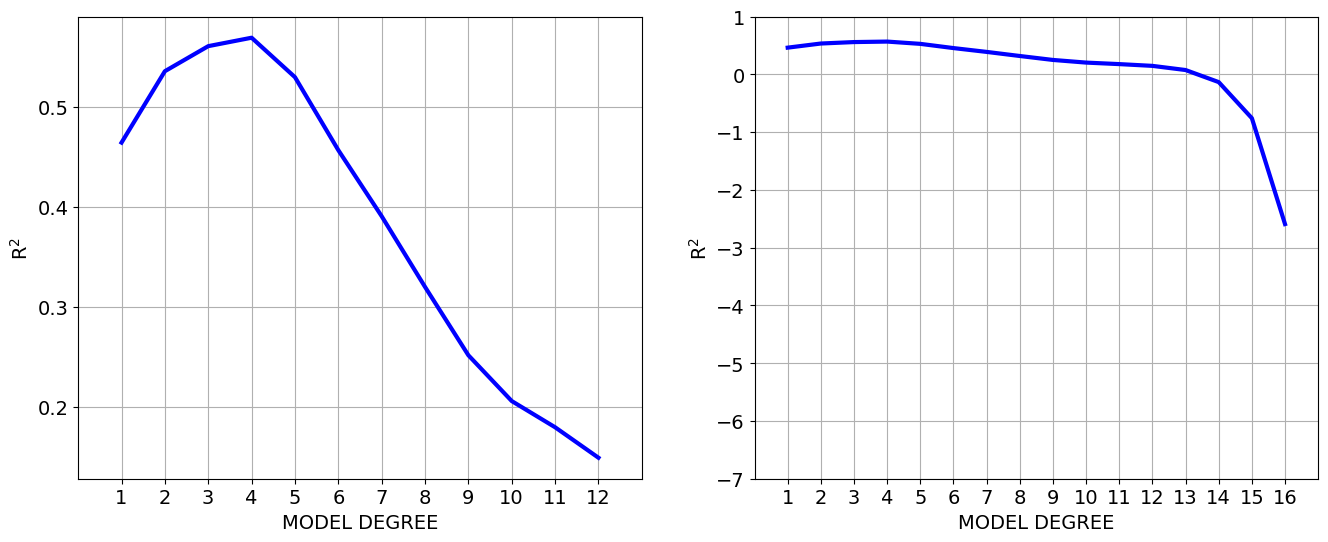

In [32]:
plt.rcParams['figure.figsize'] = (16.0, 6.0)
font = {'family' : 'sans', 'size':14}
plt.rc('font', **font)
f, axarr = plt.subplots(1, 2)

axarr[0].set_xlabel("MODEL DEGREE")
axarr[0].set_ylabel("R$^2$")
axarr[0].set_xlim([0,13])
axarr[1].set_ylim([0,1])
axarr[0].set_xticks(range(1,13))
axarr[0].grid()
axarr[0].plot(range(1,13), r2_values[0:12], color="blue",linewidth=3);

axarr[1].set_xlabel("MODEL DEGREE")
axarr[1].set_ylabel("R$^2$")
axarr[1].set_xlim([0,17])
axarr[1].set_xticks(range(1,17))
axarr[1].set_ylim([-7,1])
axarr[1].grid()
axarr[1].plot(range(1,max_polynomial+1), r2_values, color="blue",linewidth=3);

# Regularization
To avoid overfitting, we can introduce Lasso (L$_1$) and Ridge (L$_2$) regularization which will take care of variables that might cause overfit. Let's consider the version of the dataset extended by adding powers of LSTAT up to the 10th degree. Also, so far we never normalized the variables which we should do since the 

In [33]:
polynomial = PolynomialFeatures(degree=10, include_bias=False)
X_polynomial = polynomial.fit_transform(X)

scaler = StandardScaler()

scaler.fit(X_polynomial)

X_normalized = scaler.transform(X_polynomial)

Xplot = np.arange(np.min(X),np.max(X),0.1).reshape(-1,1)
Xplot_polynomial = polynomial.fit_transform(Xplot)

Xplot_normalized = scaler.transform(Xplot_polynomial)

# X_normalized = StandardScaler().fit_transform(X_polynomial)
# Xplot = np.arange(np.min(X_normalized[:,0]),np.max(X_normalized[:,0]),0.1).reshape(-1,1)

First, we apply the process using Ridge regression that define cost as, RSS($\vec{w}$) + $\alpha||\vec{w}||_2^2$ with an $\alpha$ of 0.1 (or $\lambda$)

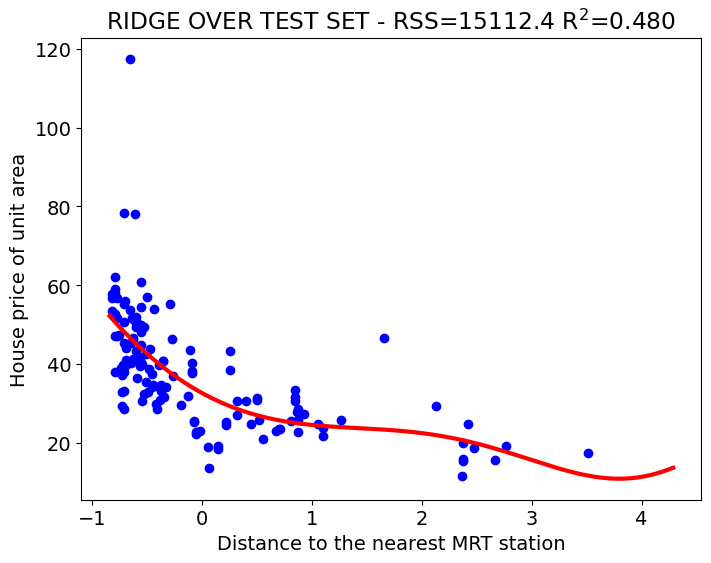

In [34]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1,max_iter=1000,random_state=1234)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_normalized, y, test_size=0.33, random_state=1234)

ridge_model = ridge.fit(X_train,y_train)

yp = ridge.predict(X_test)
yp_plot = ridge.predict(Xplot_normalized)

r2 = r2_score(y_test,yp)
rss = ((yp-y_test)**2).sum()

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_test[:,0], y_test,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("RIDGE OVER TEST SET - RSS=%.1f R$^2$=%.3f"%(rss,r2))
plt.show()

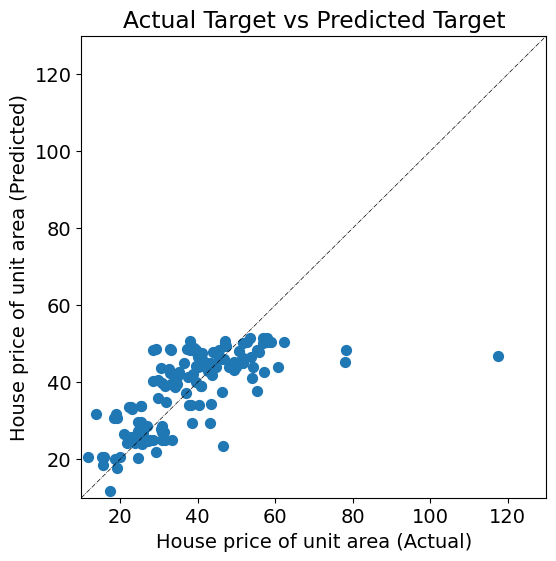

In [35]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y_test, yp, s=50)
plt.title("Actual Target vs Predicted Target")
plt.xlim(yrange)
plt.ylim(yrange)
plt.show()

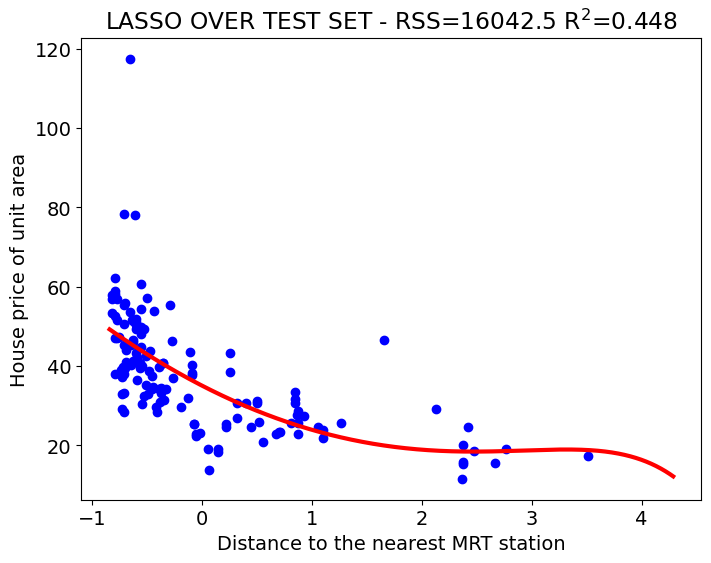

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1,max_iter=1000,random_state=1234)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_normalized, y, test_size=0.33, random_state=1234)

lasso_model = lasso.fit(X_train,y_train)

yp = lasso.predict(X_test)
yp_plot = lasso.predict(Xplot_normalized)

r2 = r2_score(y_test,yp)
rss = ((yp-y_test)**2).sum()

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_test[:,0], y_test,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("LASSO OVER TEST SET - RSS=%.1f R$^2$=%.3f"%(rss,r2))
plt.show()

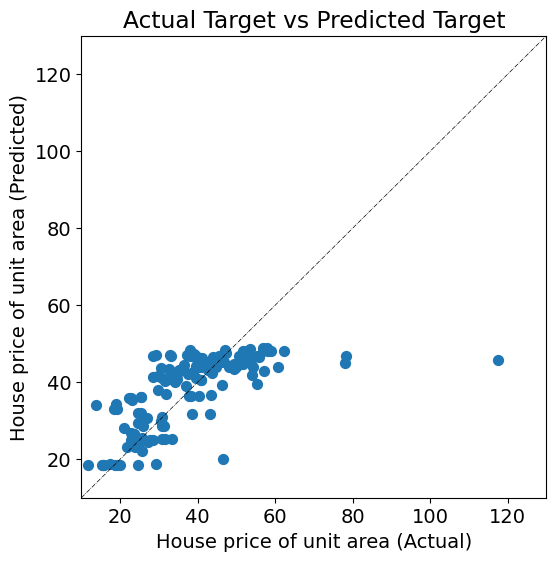

In [37]:
plt.figure(figsize=(6,6))
plt.xlabel(ylabel + " (Actual)")
plt.ylabel(ylabel + " (Predicted)")
plt.plot(yrange,yrange,lw=.5,ls="-.",color='black')
plt.scatter(y_test, yp, s=50)
plt.title("Actual Target vs Predicted Target")
plt.xlim(yrange)
plt.ylim(yrange)
plt.show()

## Model Explainability using Weights
In linear regression, we can check the final weights to understand how the model builds the prediction. In this case, we have one weight for each power of the input variable (from $x$ to $x^{10}$.

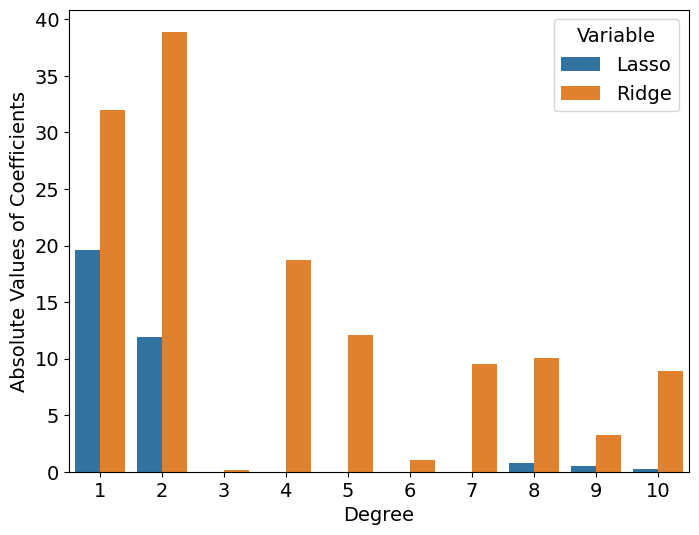

In [40]:
import seaborn
coefficients = pd.DataFrame({'Degree':[x for x in range(1,len(lasso_model.coef_)+1)], 'Lasso':np.abs(lasso_model.coef_), 'Ridge':np.abs(ridge_model.coef_)})
tidy = coefficients.melt(id_vars='Degree').rename(columns=str.title)
seaborn.barplot(x='Degree', y='Value', hue='Variable', data=tidy)
plt.ylabel("Absolute Values of Coefficients");

Note that Lasso creates a model with a lower R$^2$ score but only few variables with non zero weights. In contrast, ridge regression keeps almost all the variables in. In both models, the most relevant variables are $x$ and $x^2$

## Regularization Evaluation using Crossvalidation
We can repeat the analysis using cross-validation

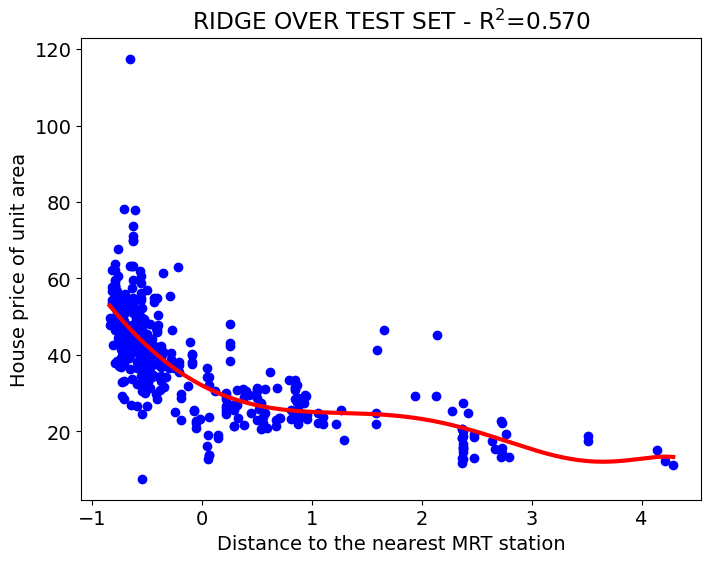

In [41]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1,max_iter=1000,random_state=1234)

score = cross_val_score(ridge, X_normalized, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))

r2 = score.mean()

yp = ridge.fit(X_normalized,y)
yp_plot = ridge.predict(Xplot_normalized)

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_normalized[:,0], y,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("RIDGE OVER TEST SET - R$^2$=%.3f"%(r2))
plt.show()

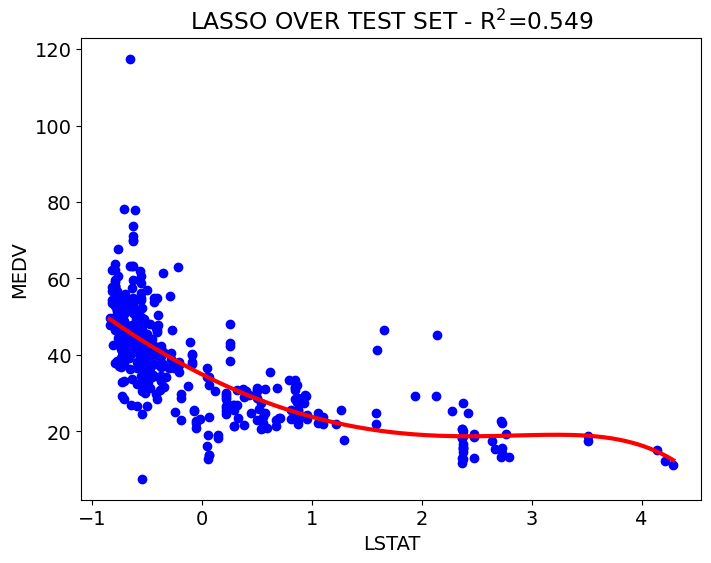

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1,max_iter=1000,random_state=1234)

score = cross_val_score(lasso, X_normalized, y, cv=KFold(n_splits=10, shuffle=True, random_state=1234))

r2 = score.mean()

yp = lasso.fit(X_normalized,y)
yp_plot = lasso.predict(Xplot_normalized)

plt.rcParams['figure.figsize'] = (8.0, 6.0)
font = {'family' : 'sans', 'size'   : 14}
plt.rc('font', **font)

plt.scatter(X_normalized[:,0], y,  color='blue')
plt.plot(Xplot_normalized[:,0], yp_plot, color='red', linewidth=3)
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title("LASSO OVER TEST SET - R$^2$=%.3f"%(r2))
plt.show()

As before, the results from the cross-validation are less optimistic. Note that, when using cross-validation the final model is produced using the entire dataset.